<a href="https://colab.research.google.com/github/leo96code/Scripts/blob/main/FloodDamageDetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flood Damage Assessment

In [ ]:
import os
HOME = "/content/drive/MyDrive/Flood"
print(HOME)

/content/drive/MyDrive/Flood


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Importing Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AtAN7fsWbxIN9Moql1gJ")
project = rf.workspace("flood-k4tkl").project("floodbuilding")
dataset = project.version(1).download("yolov8")


/content/drive/MyDrive/Flood/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
retrying...
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to floodbuilding-1 in yolov8:: 100%|██████████| 3002/3002 [00:27<00:00, 109.86it/s]


## Training Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Flood/datasets/floodbuilding-1/data.yaml epochs=50 imgsz=650 plots=True save=true

/content/drive/MyDrive/Flood
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/Flood/datasets/floodbuilding-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=650, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

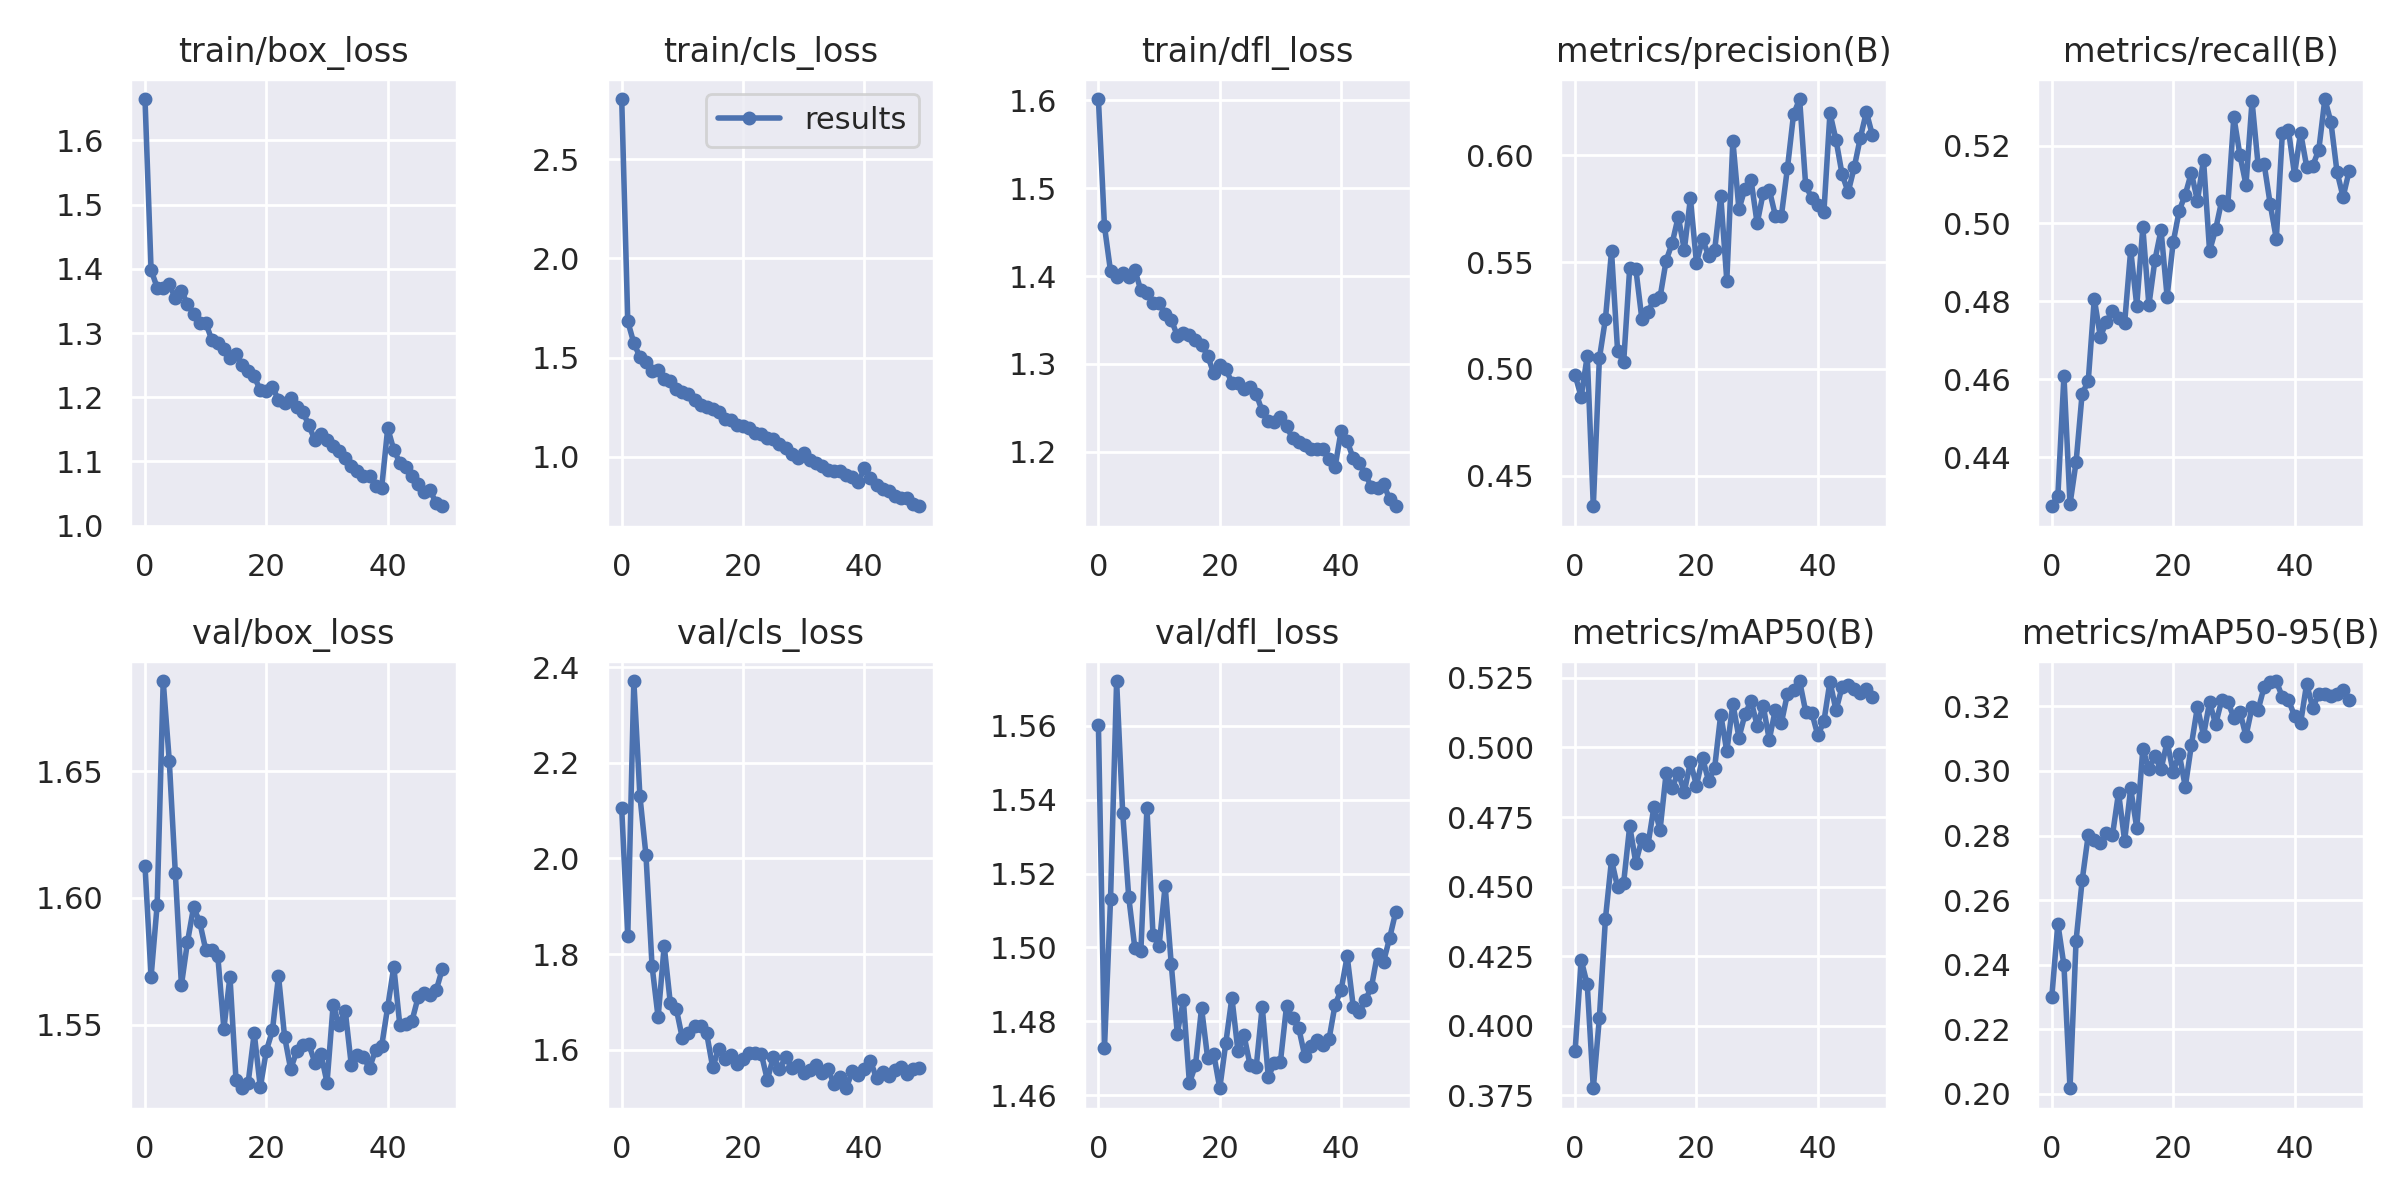

In [ ]:
import torch

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Flood/datasets/runs/detect/train9/weights/best.pt conf=0.10 source=/content/drive/MyDrive/Flood/Infer save=True hide_conf=True

2023-06-08 23:29:30.025410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/2 /content/drive/MyDrive/Flood/Infer/infer1.jpg: 448x672 5 1s, 31 2s, 18 3s, 1 4, 61.5ms
image 2/2 /content/drive/MyDrive/Flood/Infer/infer2.jpg: 384x672 1 0, 5 1s, 4 2s, 8 3s, 1 4, 62.9ms
Speed: 0.6ms pre-process, 62.2ms inference, 42.9ms postprocess per image at shape (1, 3, 672, 672)
Results saved to runs/detect/predict8


In [ ]:
model = YOLO("/content/drive/MyDrive/Flood/datasets/runs/detect/train9/weights/best.pt")

In [ ]:
results = model.predict("/content/drive/MyDrive/Flood/Infer/infer2.jpg")

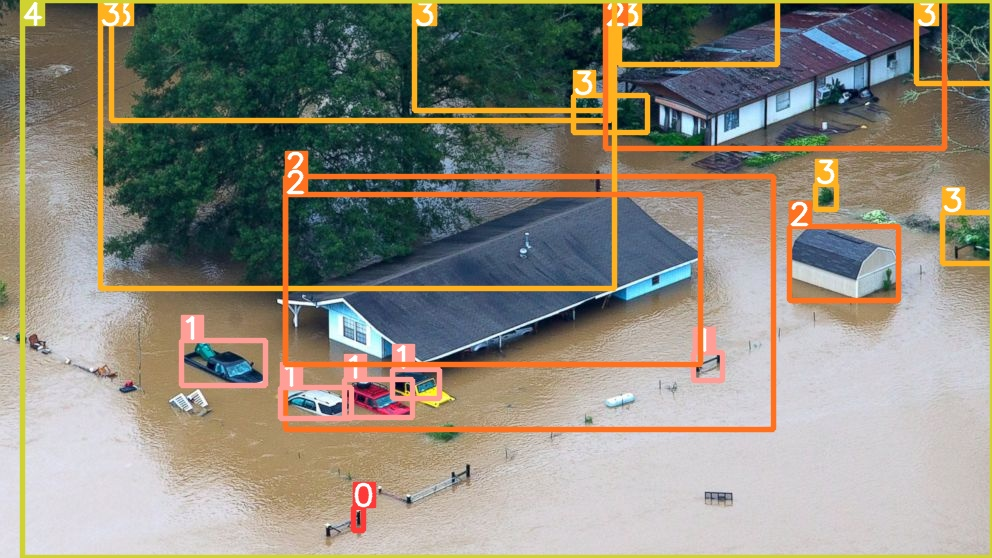

In [ ]:
cls = results[0].boxes.cls

In [ ]:
counts = torch.bincount(cls.to(torch.int64))

labels = {
    1: 'Car',
    2: 'Home',
    3: 'Tree',
    4: 'Other'
}
print("Family No - 24")
for idx, count in enumerate(counts):
    if idx in labels:
        print(f'{labels[idx]}: {count.item()}')

Family No - 24
Car: 3
Home: 3
Tree: 4
Other: 1


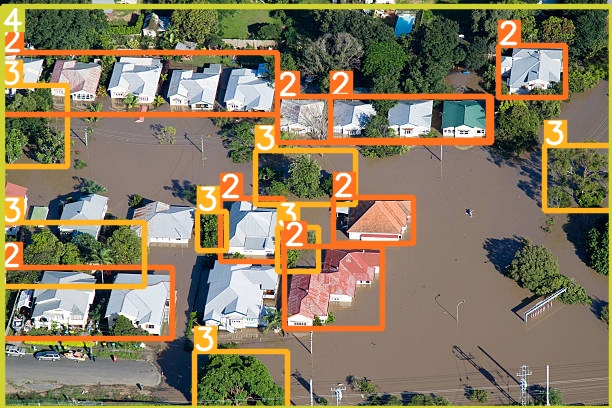

In [ ]:
results

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([11, 6])
 dtype: torch.float32
  + tensor([[2.85000e+02, 1.94000e+02, 7.00000e+02, 3.64000e+02, 9.17288e-01, 2.00000e+00],
         [2.20000e+01, 0.00000e+00, 9.92000e+02, 5.57000e+02, 8.93342e-01, 4.00000e+00],
         [7.89000e+02, 2.26000e+02, 8.98000e+02, 3.00000e+02, 8.30460e-01, 2.00000e+00],
         [1.00000e+02, 0.00000e+00, 6.14000e+02, 2.88000e+02, 6.93665e-01, 3.00000e+00],
         [9.42000e+02, 2.12000e+02, 9.92000e+02, 2.63000e+02, 6.56730e-01, 3.00000e+00],
         [6.05000e+02, 0.00000e+00, 9.44000e+02, 1.48000e+02, 6.08556e-01, 2.00000e+00],
         [2.80000e+02, 3.87000e+02, 3.51000e+02, 4.18000e+02, 5.68361e-01, 1.00000e+00],
         [3.44000e+02, 3.79000e+02, 4.12000e+02, 4.17000e+02, 3.79758e-01, 1.00000e+00],
         [3.92000e+02, 3.69000e+02, 4.39000e+02, 3.98000e+02, 2.88649e-01, 1.00000e+00],
         [8.15000e+02, 1.84000e+02, 8.36000e

In [ ]:
cls

tensor([2., 4., 2., 3., 3., 2., 1., 1., 1., 3., 3.], device='cuda:0')